In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('train.tsv', sep='\t')
df.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,0.443783,0.0,0,0.090774,0,0.245831,0.003883,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,0.468649,0.0,0,0.098707,0,0.203490,0.088652,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,0.525448,0.0,0,0.072448,0,0.226402,0.120536,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,0.480725,0.0,0,0.095861,0,0.265656,0.035343,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,0.446143,0.0,0,0.024908,0,0.228887,0.050473,1,1,14,0,12032,162,10,0.098765,0.082569,0


In [5]:
df['boilerplate'][0]

'{"title":"IBM Sees Holographic Calls Air Breathing Batteries ibm sees holographic calls, air-breathing batteries","body":"A sign stands outside the International Business Machines Corp IBM Almaden Research Center campus in San Jose California Photographer Tony Avelar Bloomberg Buildings stand at the International Business Machines Corp IBM Almaden Research Center campus in the Santa Teresa Hills of San Jose California Photographer Tony Avelar Bloomberg By 2015 your mobile phone will project a 3 D image of anyone who calls and your laptop will be powered by kinetic energy At least that s what International Business Machines Corp sees in its crystal ball The predictions are part of an annual tradition for the Armonk New York based company which surveys its 3 000 researchers to find five ideas expected to take root in the next five years IBM the world s largest provider of computer services looks to Silicon Valley for input gleaning many ideas from its Almaden research center in San Jose

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


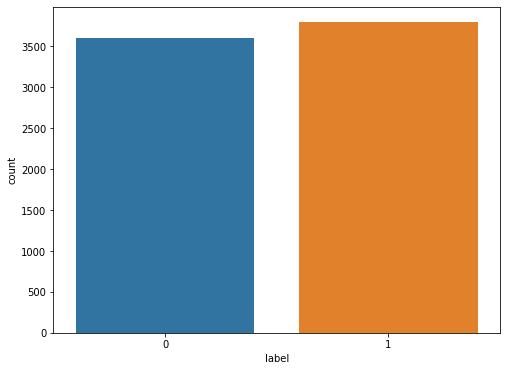

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(df.label)

In [7]:
import json

title=[]
body=[]
urlid=[]
label=[]

for i in range(7395):
    X=json.loads(df["boilerplate"][i])
    if 'title' in X.keys() and 'body' in X.keys():
        title.append(X.get('title'))
        body.append(X.get('body'))
        urlid.append(df['urlid'][i])
        label.append(df['label'][i])
    

dictt = {'urlid':urlid,'title':title,'body':body,'label':label}
new = pd.DataFrame.from_dict(dictt) 

new.dropna()

,urlid,title,body,label
0,4042,IBM Sees Holographic Calls Air Breathing Batte...,A sign stands outside the International Busine...,0
1,8471,The Fully Electronic Futuristic Starting Gun T...,And that can be carried on a plane without the...,1
2,1164,Fruits that Fight the Flu fruits that fight th...,Apples The most popular source of antioxidants...,1
3,6684,10 Foolproof Tips for Better Sleep,There was a period in my life when I had a lot...,1
4,9006,The 50 Coolest Jerseys You Didn t Know Existed...,Jersey sales is a curious business Whether you...,0
...,...,...,...,...
7389,8958,Kno Raises 46 Million More To Build Most Power...,Marc Andreessen is normally enthusiastic about...,0
7390,8895,Why I Miss College,Mar 30 2009 I d like to congratulate Jane on h...,0
7391,1191,Sweet Potatoes Eat This Not That i'm eating t...,They re loaded with vitamin C which smoothes o...,1
7392,5612,Naturally Ella,,1


In [8]:
for i in range(7393):
    if new['body'][i] is  None :
            new.drop(index=i,inplace=True)
    elif len(new['body'][i]) < 20:
            new.drop(index=i,inplace=True)
new.reset_index(inplace=True)         

In [9]:
new.drop(columns=['index'],inplace=True)
new

,urlid,title,body,label
0,4042,IBM Sees Holographic Calls Air Breathing Batte...,A sign stands outside the International Busine...,0
1,8471,The Fully Electronic Futuristic Starting Gun T...,And that can be carried on a plane without the...,1
2,1164,Fruits that Fight the Flu fruits that fight th...,Apples The most popular source of antioxidants...,1
3,6684,10 Foolproof Tips for Better Sleep,There was a period in my life when I had a lot...,1
4,9006,The 50 Coolest Jerseys You Didn t Know Existed...,Jersey sales is a curious business Whether you...,0
...,...,...,...,...
6683,8923,Gummy Snake Worth1000 Contests,Entry Details Entered 12 1 2008 12 08 35 PM Ra...,0
6684,8958,Kno Raises 46 Million More To Build Most Power...,Marc Andreessen is normally enthusiastic about...,0
6685,8895,Why I Miss College,Mar 30 2009 I d like to congratulate Jane on h...,0
6686,1191,Sweet Potatoes Eat This Not That i'm eating t...,They re loaded with vitamin C which smoothes o...,1


In [10]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
data=new.iloc[:,1:3]
data.replace("[^a-zA-Z]"," ",regex=True,inplace=True)
data['title']=data['title'].str.lower()
data['body']=data['body'].str.lower()
data


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,title,body
0,ibm sees holographic calls air breathing batte...,a sign stands outside the international busine...
1,the fully electronic futuristic starting gun t...,and that can be carried on a plane without the...
2,fruits that fight the flu fruits that fight th...,apples the most popular source of antioxidants...
3,foolproof tips for better sleep,there was a period in my life when i had a lot...
4,the coolest jerseys you didn t know existed...,jersey sales is a curious business whether you...
...,...,...
6683,gummy snake worth contests,entry details entered pm ra...
6684,kno raises million more to build most power...,marc andreessen is normally enthusiastic about...
6685,why i miss college,mar i d like to congratulate jane on h...
6686,sweet potatoes eat this not that i m eating t...,they re loaded with vitamin c which smoothes o...


In [11]:
titlebodycombined_train=[]

for row in range(0,len(data.index)):
    titlebodycombined_train.append(' '.join(str(x) for x in data.iloc[row,1:3]))

titlebodycombined_train[0]


'a sign stands outside the international business machines corp ibm almaden research center campus in san jose california photographer tony avelar bloomberg buildings stand at the international business machines corp ibm almaden research center campus in the santa teresa hills of san jose california photographer tony avelar bloomberg by      your mobile phone will project a   d image of anyone who calls and your laptop will be powered by kinetic energy at least that s what international business machines corp sees in its crystal ball the predictions are part of an annual tradition for the armonk new york based company which surveys its       researchers to find five ideas expected to take root in the next five years ibm the world s largest provider of computer services looks to silicon valley for input gleaning many ideas from its almaden research center in san jose california holographic conversations projected from mobile phones lead this year s list the predictions also include air 

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
corpus=[]
stops = set(stopwords.words("english"))

for i in range(len(titlebodycombined_train)):
    tokens=nltk.word_tokenize(titlebodycombined_train[i])
    #taken only words(not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    #stem words 
    stemmed_list=[ps.stem(word) for word in token_words]
    #remove stopwords
    meaningful_words = [w for w in stemmed_list if not w in stops]
    rejoined_words = ( " ".join(meaningful_words))
    corpus.append(rejoined_words)

corpus[0]

'sign stand outsid intern busi machin corp ibm almaden research center campu san jose california photograph toni avelar bloomberg build stand intern busi machin corp ibm almaden research center campu santa teresa hill san jose california photograph toni avelar bloomberg mobil phone project imag anyon call laptop power kinet energi least intern busi machin corp see crystal ball predict part annual tradit armonk new york base compani survey research find five idea expect take root next five year ibm world largest provid comput servic look silicon valley input glean mani idea almaden research center san jose california holograph convers project mobil phone lead thi year list predict also includ air breath batteri comput program tell traffic jam take place environment inform gener sensor car phone citi power heat thrown comput server stretch goal good said paul saffo manag director foresight invest advisori firm discern san francisco era pessim new black littl dose technolog optim bad thin

In [14]:
y=list(new['label'])

In [15]:
df = pd.DataFrame(list(zip(corpus, y)), columns =['boilerplate', 'label']) 

In [16]:
df.to_csv('cleaned_train.csv',index=False)